# Random Forest - Regression
## Plus: An Additional Analysis of Various Regression Methods!

## The Data

We just got hired by a tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!

They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. You will notice it has almost a sine wave like relationship, where signal strength oscillates based off the density.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("Data/rock_density_xray.csv")

In [7]:
df.head()

Rebound Signal Strength nHz  Rock Density kg/m3
0                    72.945124            2.456548
1                    14.229877            2.601719
2                    36.597334            1.967004
3                     9.578899            2.300439
4                    21.765897            2.452374

In [9]:
df.columns=['Signal',"Density"]

<Axes: xlabel='Signal', ylabel='Density'>

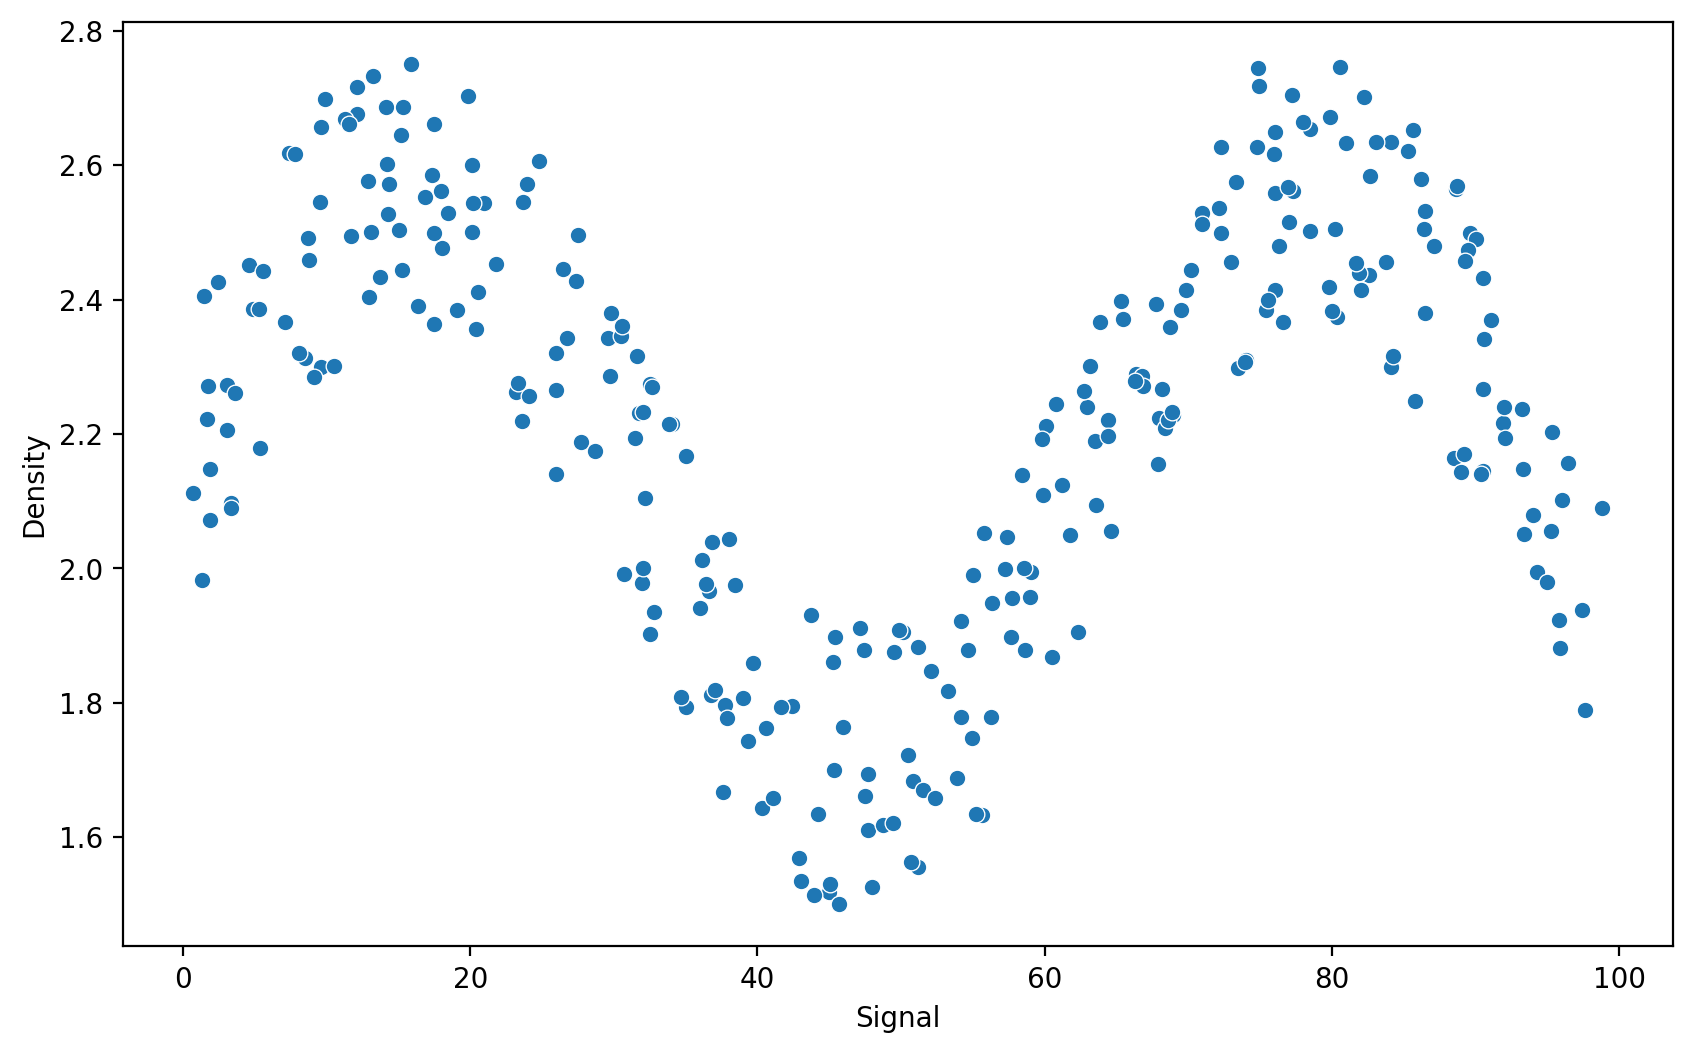

In [13]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

## Splitting the Data

Let's split the data in order to be able to have a Test set for performance metric evaluation.

In [15]:
X = df['Signal'].values.reshape(-1,1)  
y = df['Density']

In [17]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

In [30]:
lr_model = LinearRegression()

In [32]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [34]:
lr_preds = lr_model.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error

In [38]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

In [40]:
y.mean()

2.225062949323796

What does the fit look like?

In [43]:
signal_range = np.arange(0,100)

In [45]:
lr_output = lr_model.predict(signal_range.reshape(-1,1))

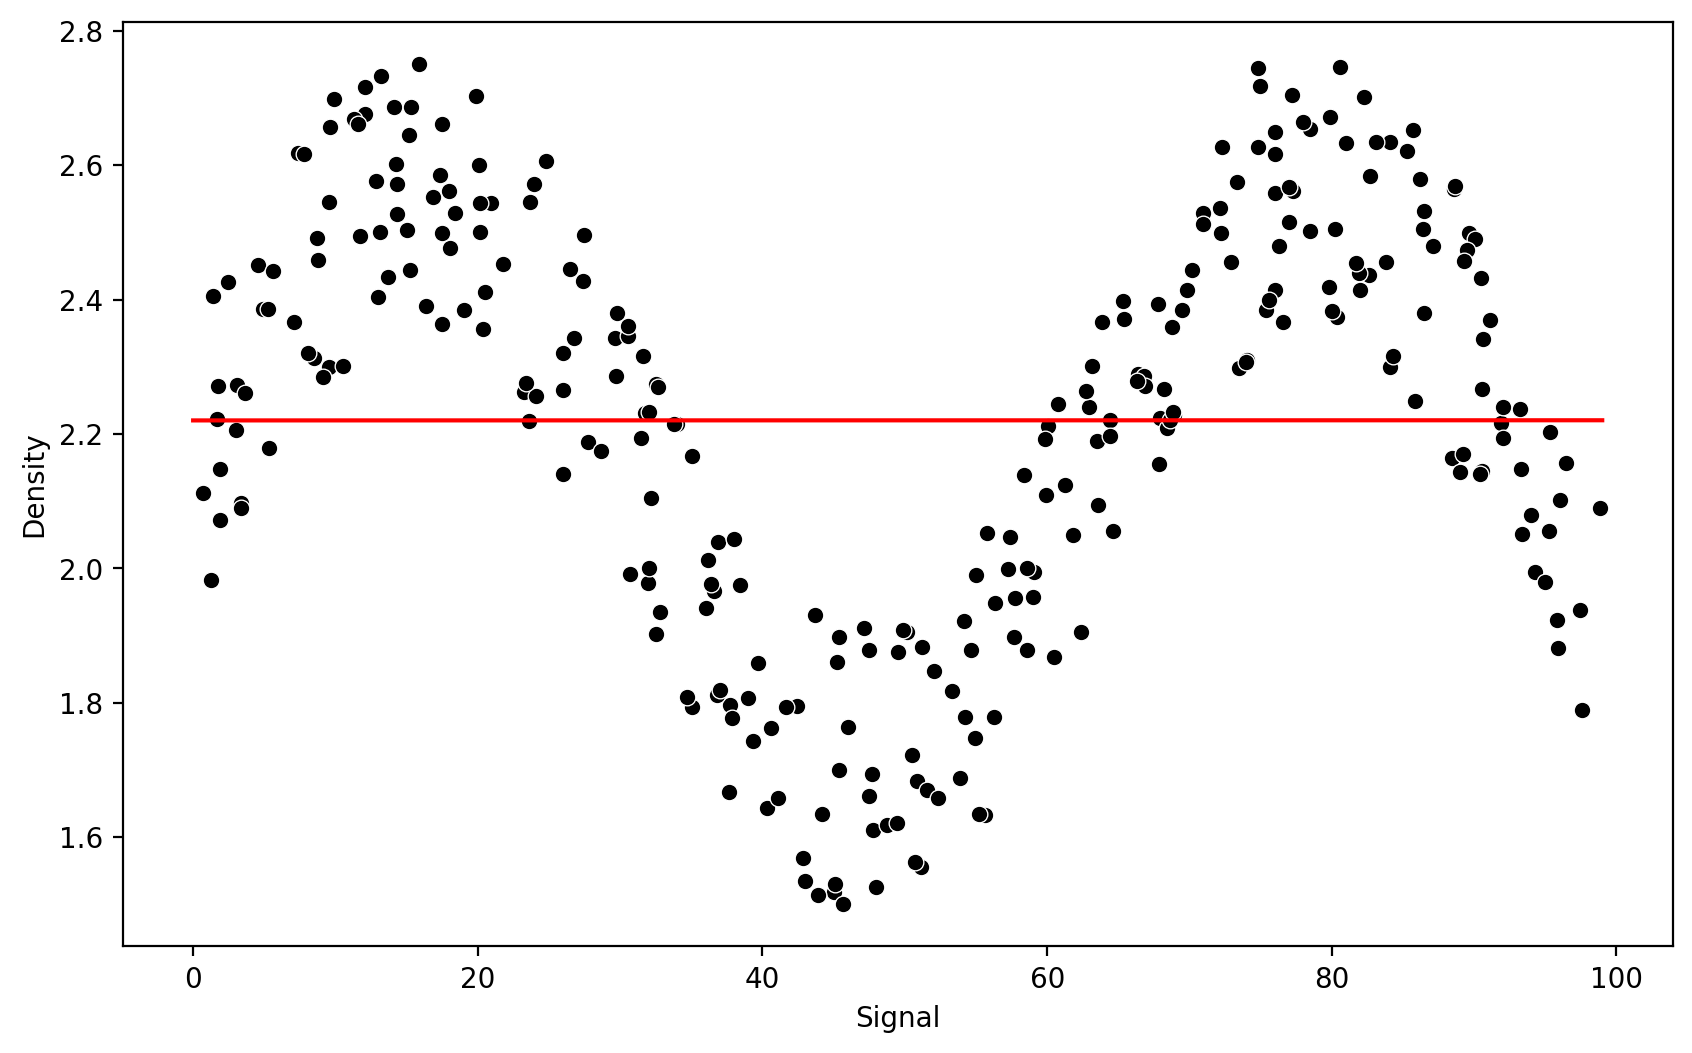

In [51]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal_range,lr_output, color='red')

# Polynomial Regression

## Attempting with a Polynomial Regression Model

Let's explore why our standard regression approach of a polynomial could be difficult to fit here, keep in mind, we're in a fortunate situation where we can easily visualize results of y vs x.

## Function to Help Run Models

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [64]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(10,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output,color='red')

RMSE : 0.2570051996584629


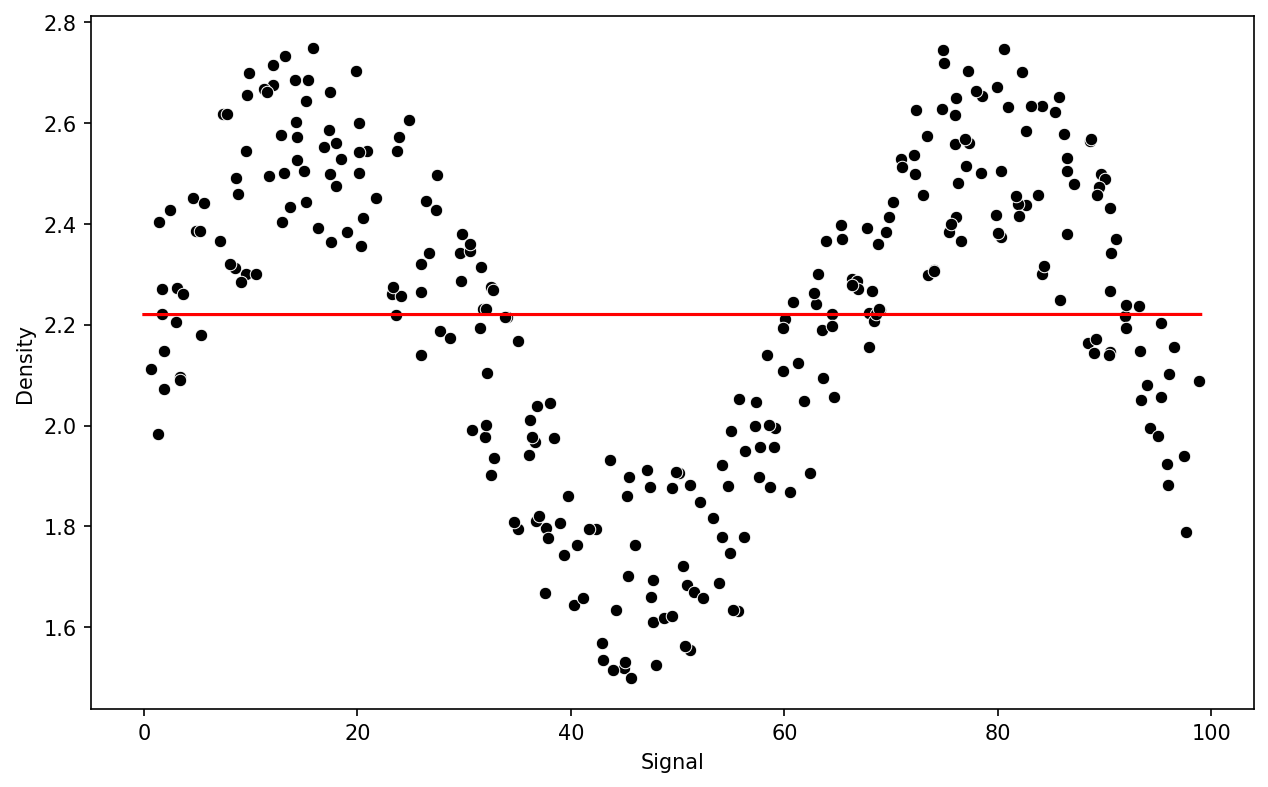

In [66]:
run_model(model,X_train,y_train,X_test,y_test)

## Pipeline for Poly Orders

In [68]:
from sklearn.pipeline import make_pipeline

In [70]:
from sklearn.preprocessing import PolynomialFeatures

In [72]:
pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())

RMSE : 0.28173095637255463


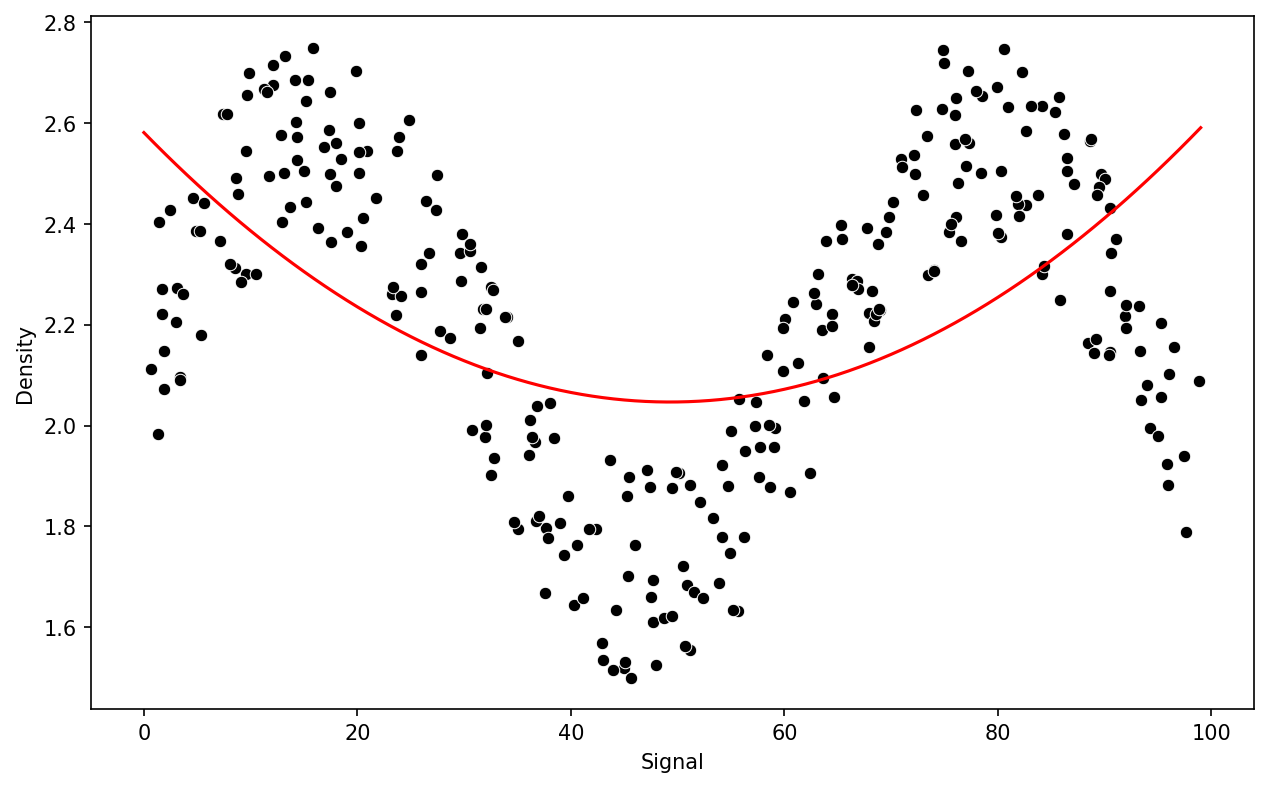

In [74]:
run_model(pipe,X_train,y_train,X_test,y_test)

## Comparing Various Polynomial Orders

RMSE : 0.14588633397625778


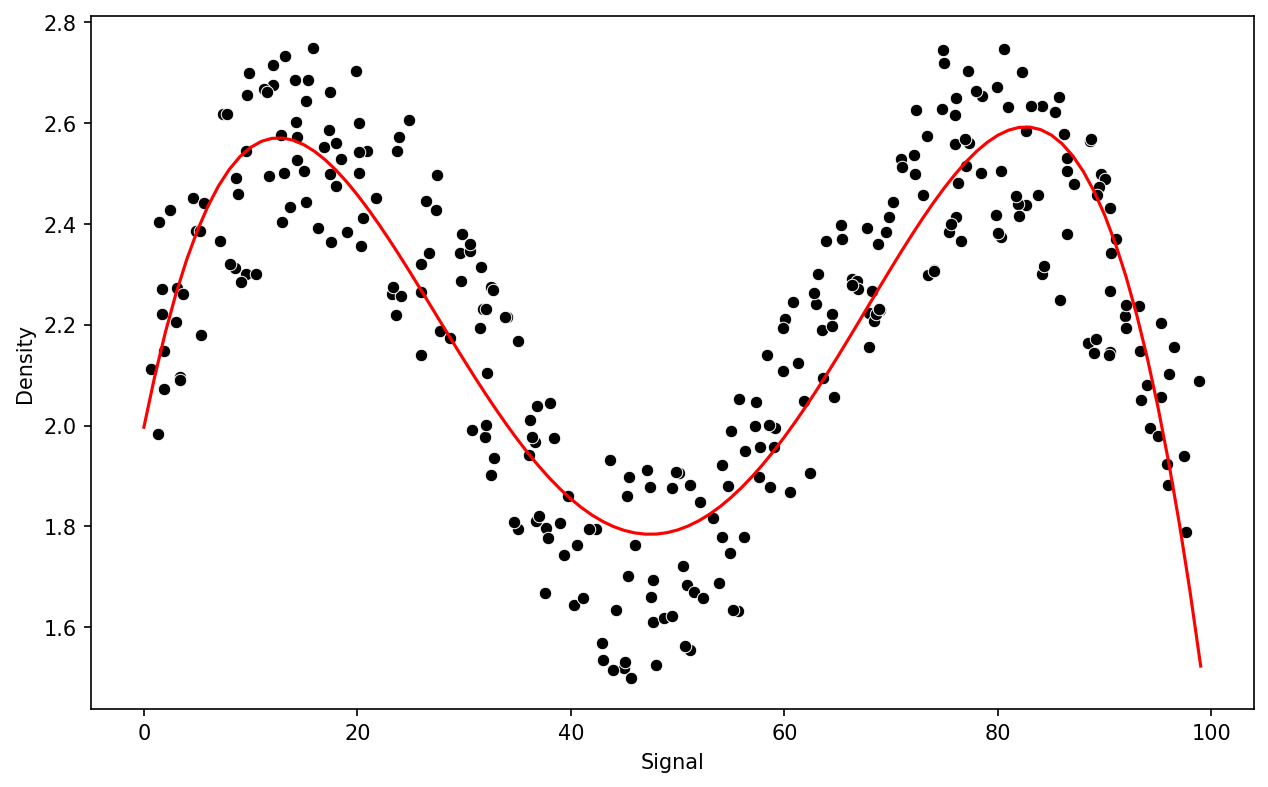

In [84]:
pipe = make_pipeline(PolynomialFeatures(4),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

RMSE : 0.14034142046390416


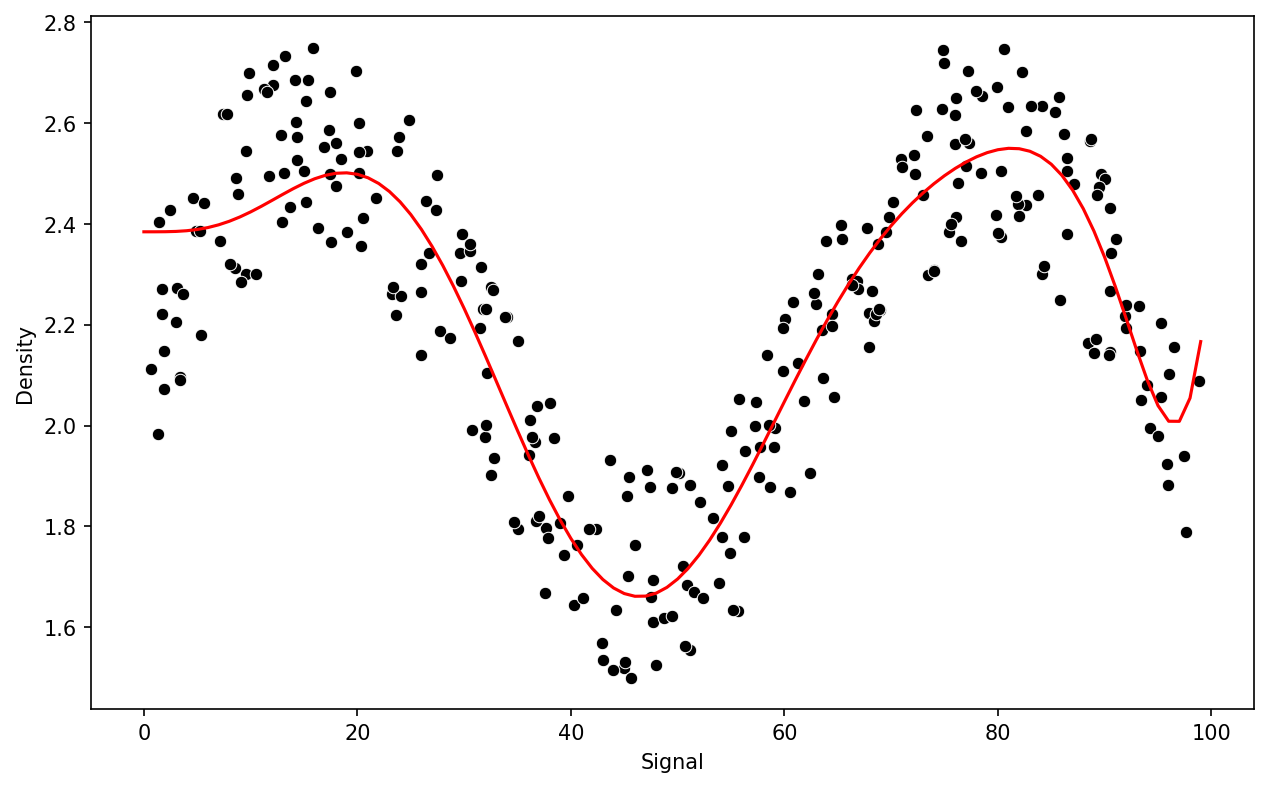

In [76]:
pipe = make_pipeline(PolynomialFeatures(10),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

## KNN Regression

In [87]:
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.1523487028635337
RMSE : 0.13730685016923647
RMSE : 0.13277855732740926


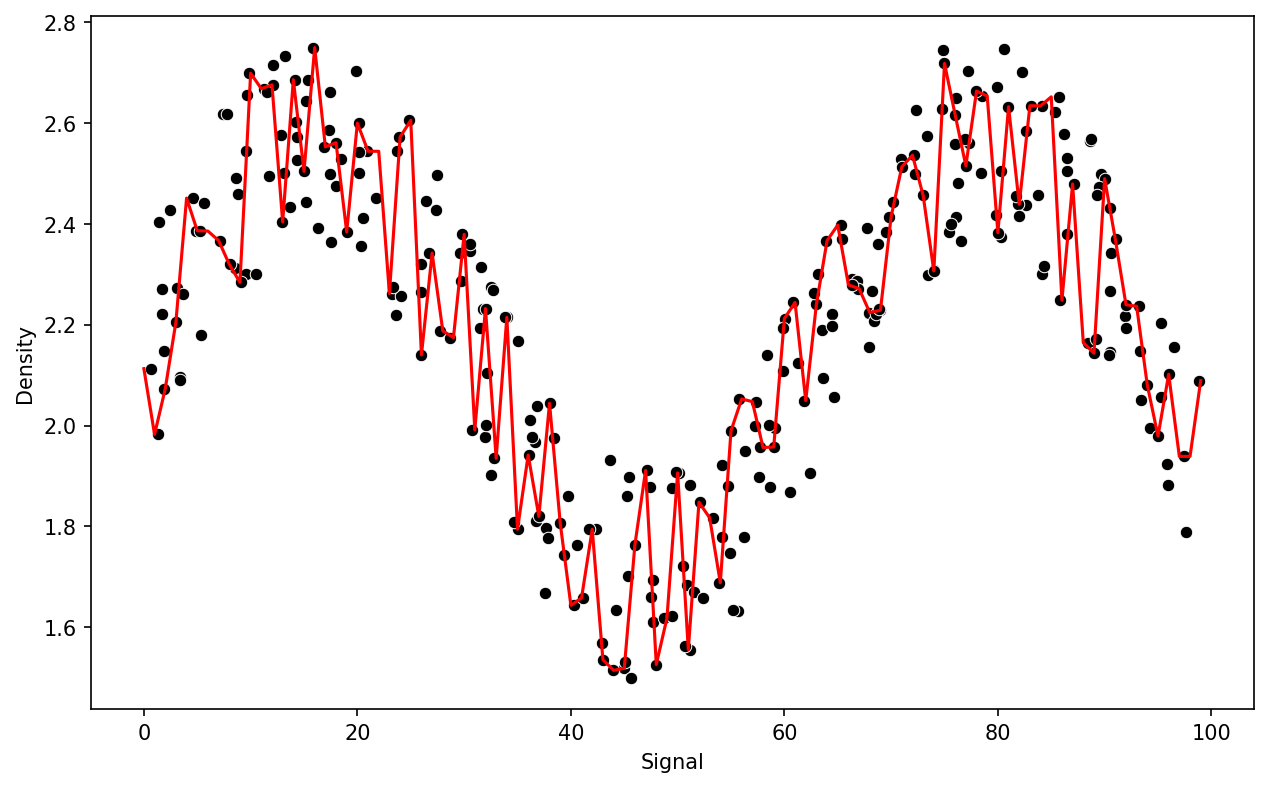

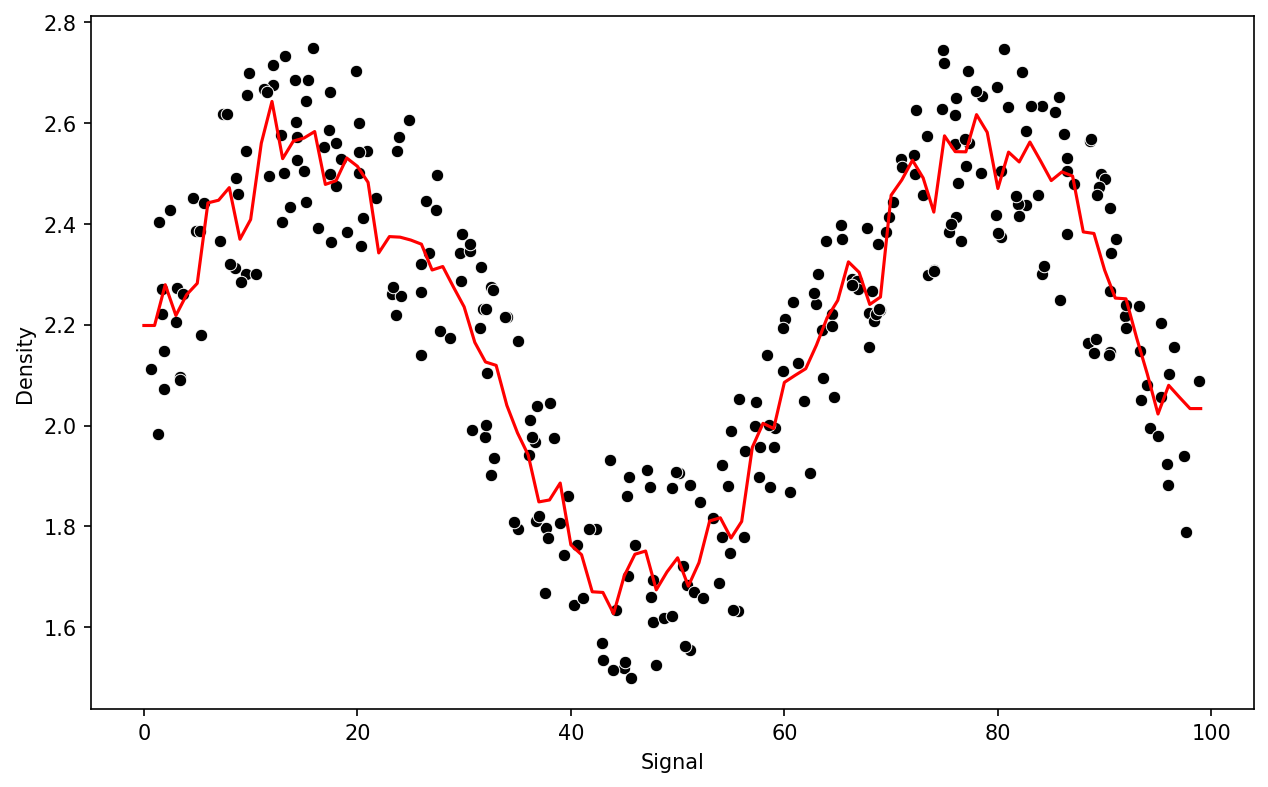

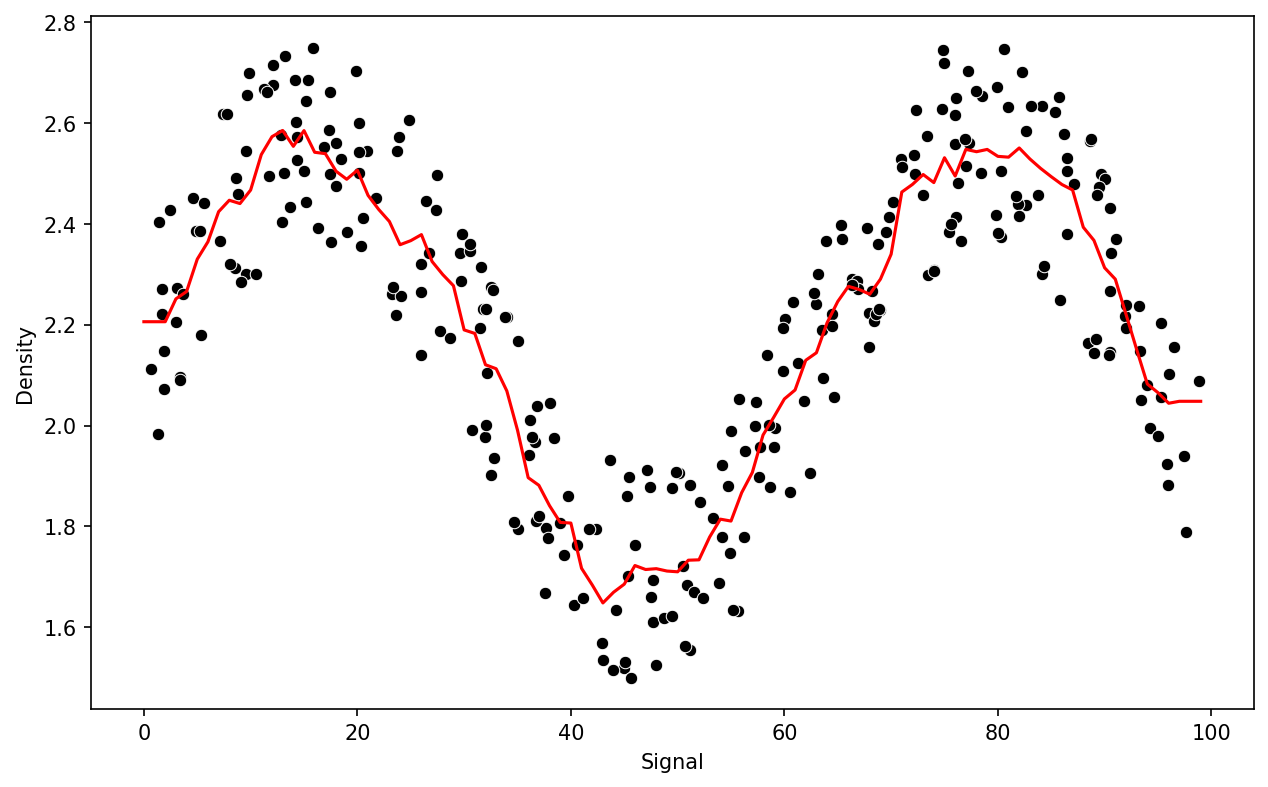

In [89]:
preds = {}
k_values = [1,5,10]

for n in k_values:  
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

## Decision Tree Regression

In [92]:
from sklearn.tree import DecisionTreeRegressor

RMSE : 0.1523487028635337


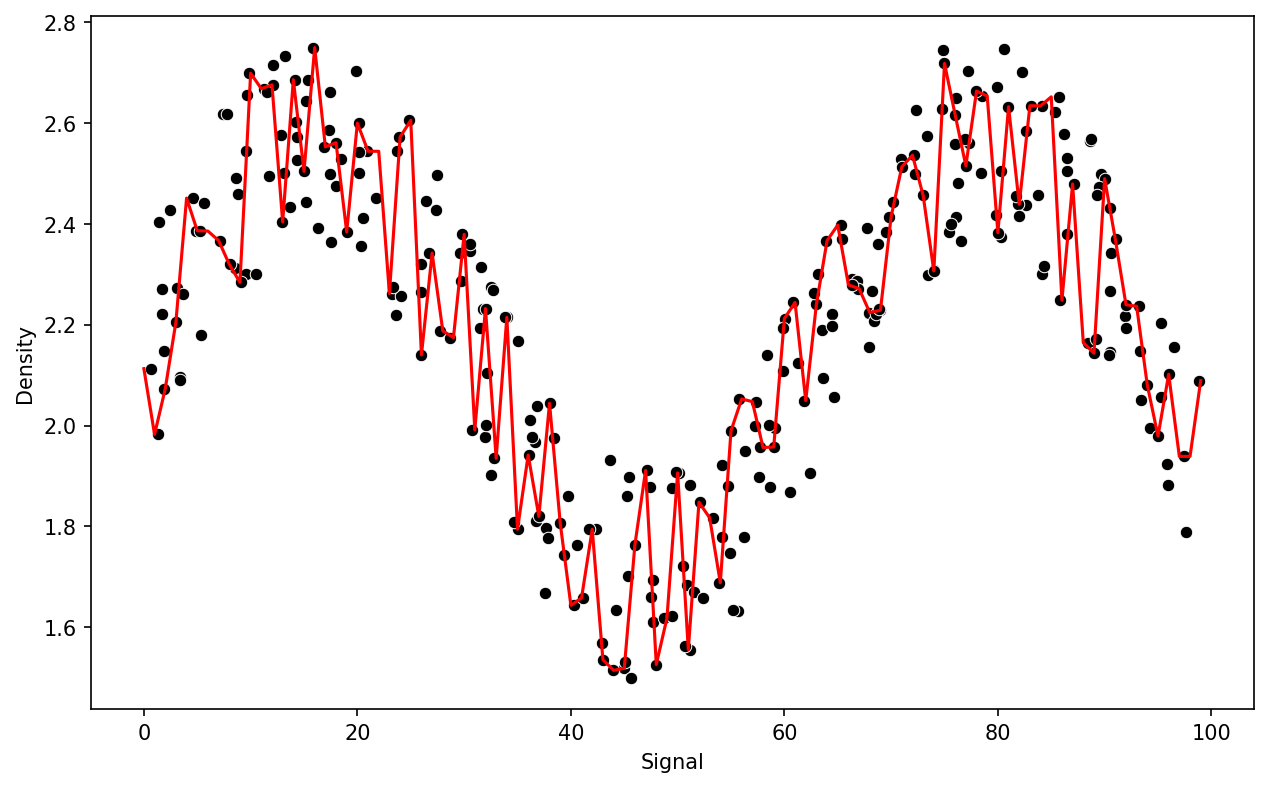

In [94]:
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

In [96]:
model.get_n_leaves()

270

In [101]:
from sklearn.tree import plot_tree

[Text(0.35031591086278585, 0.9761904761904762, 'x[0] <= 27.551\nsquared_error = 0.102\nsamples = 270\nvalue = 2.22'),
 Text(0.08917824707298391, 0.9285714285714286, 'x[0] <= 3.966\nsquared_error = 0.032\nsamples = 71\nvalue = 2.44'),
 Text(0.015756647335594703, 0.8809523809523809, 'x[0] <= 1.356\nsquared_error = 0.018\nsamples = 11\nvalue = 2.196'),
 Text(0.007002954371375424, 0.8333333333333334, 'x[0] <= 0.992\nsquared_error = 0.004\nsamples = 2\nvalue = 2.048'),
 Text(0.003501477185687712, 0.7857142857142857, 'squared_error = 0.0\nsamples = 1\nvalue = 2.113'),
 Text(0.010504431557063137, 0.7857142857142857, 'squared_error = -0.0\nsamples = 1\nvalue = 1.982'),
 Text(0.024510340299813985, 0.8333333333333334, 'x[0] <= 3.216\nsquared_error = 0.015\nsamples = 9\nvalue = 2.229'),
 Text(0.01750738592843856, 0.7857142857142857, 'x[0] <= 1.545\nsquared_error = 0.013\nsamples = 7\nvalue = 2.268'),
 Text(0.014005908742750848, 0.7380952380952381, 'squared_error = 0.0\nsamples = 1\nvalue = 2.405'

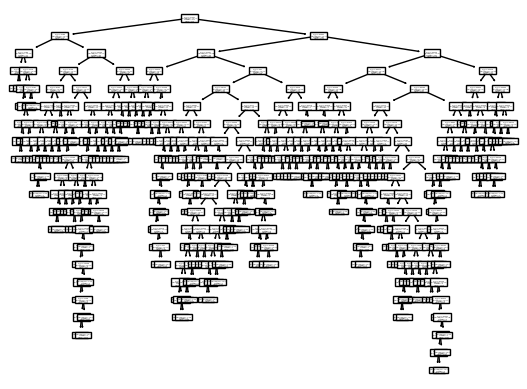

In [103]:
plot_tree(model)

## Support Vector Regression

In [105]:
from sklearn.svm import SVR

In [107]:
from sklearn.model_selection import GridSearchCV

In [109]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [111]:
grid = GridSearchCV(svr,param_grid)

RMSE : 0.12646999302046696


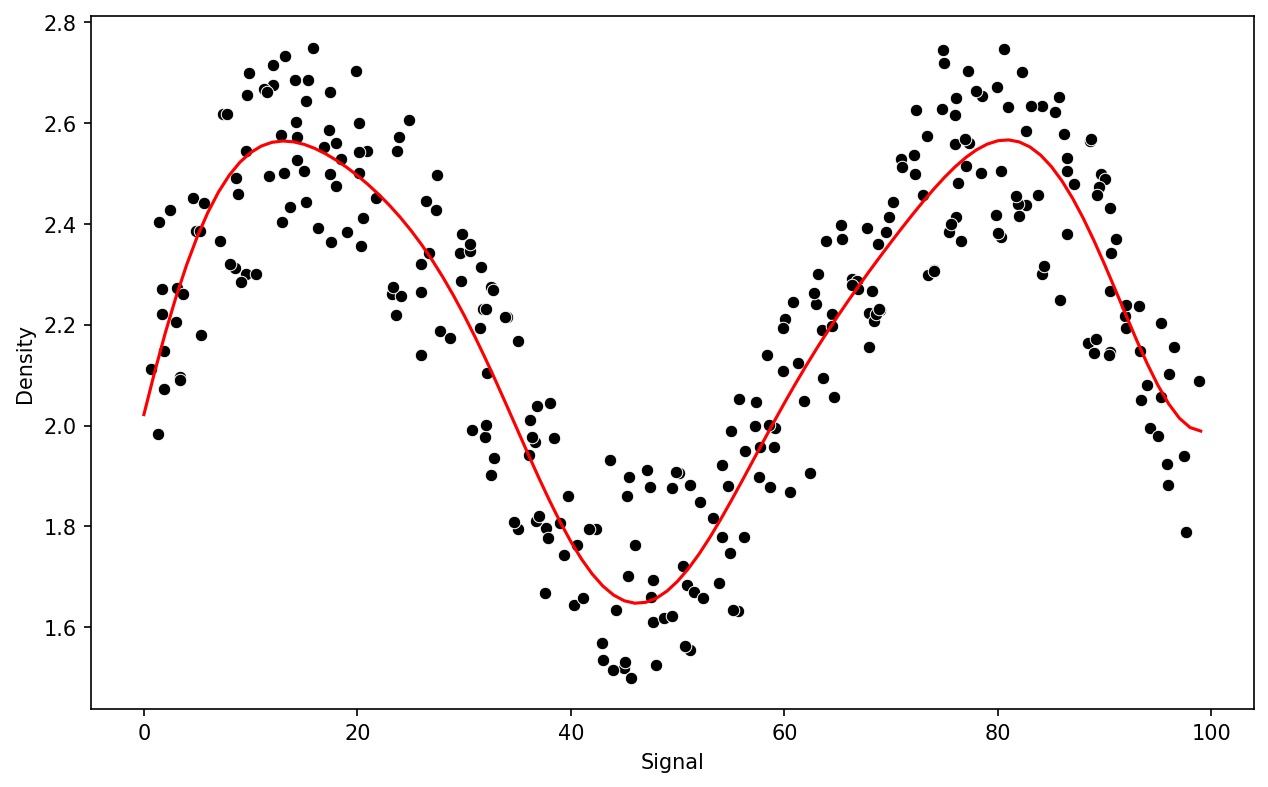

In [113]:
run_model(grid,X_train,y_train,X_test,y_test)

In [115]:
grid.best_estimator_

SVR(C=1000)

## Random Forest Regression

In [118]:
from sklearn.ensemble import RandomForestRegressor

In [289]:
# help(RandomForestRegressor)

RMSE : 0.13751561581411925
RMSE : 0.13181939953833333
RMSE : 0.13745423081827016


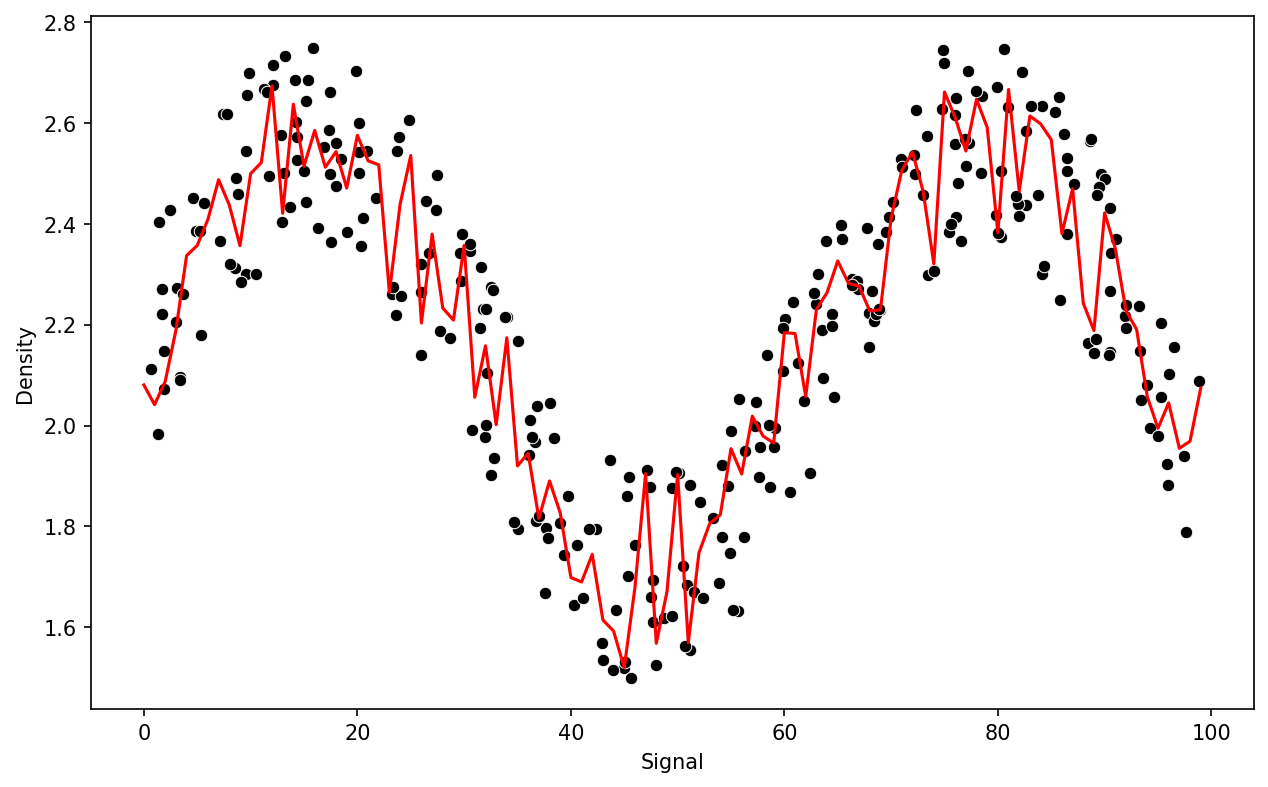

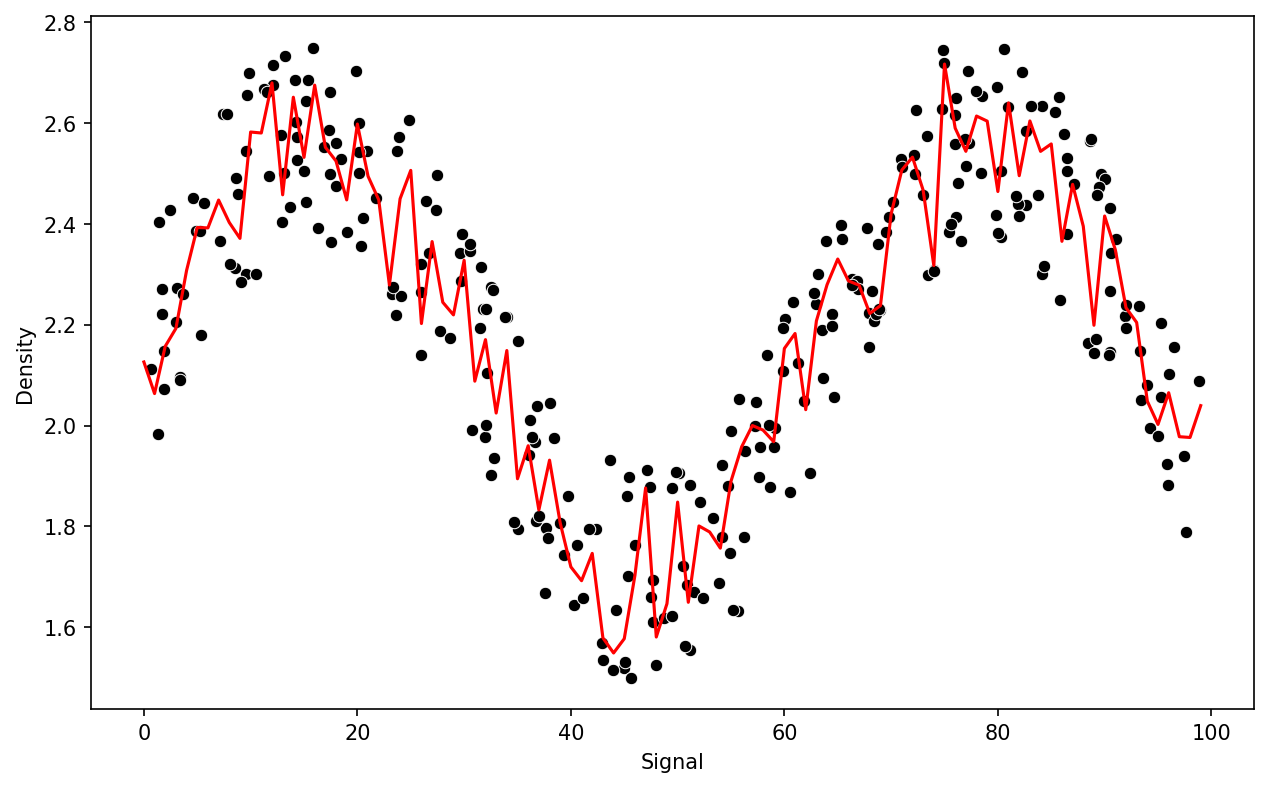

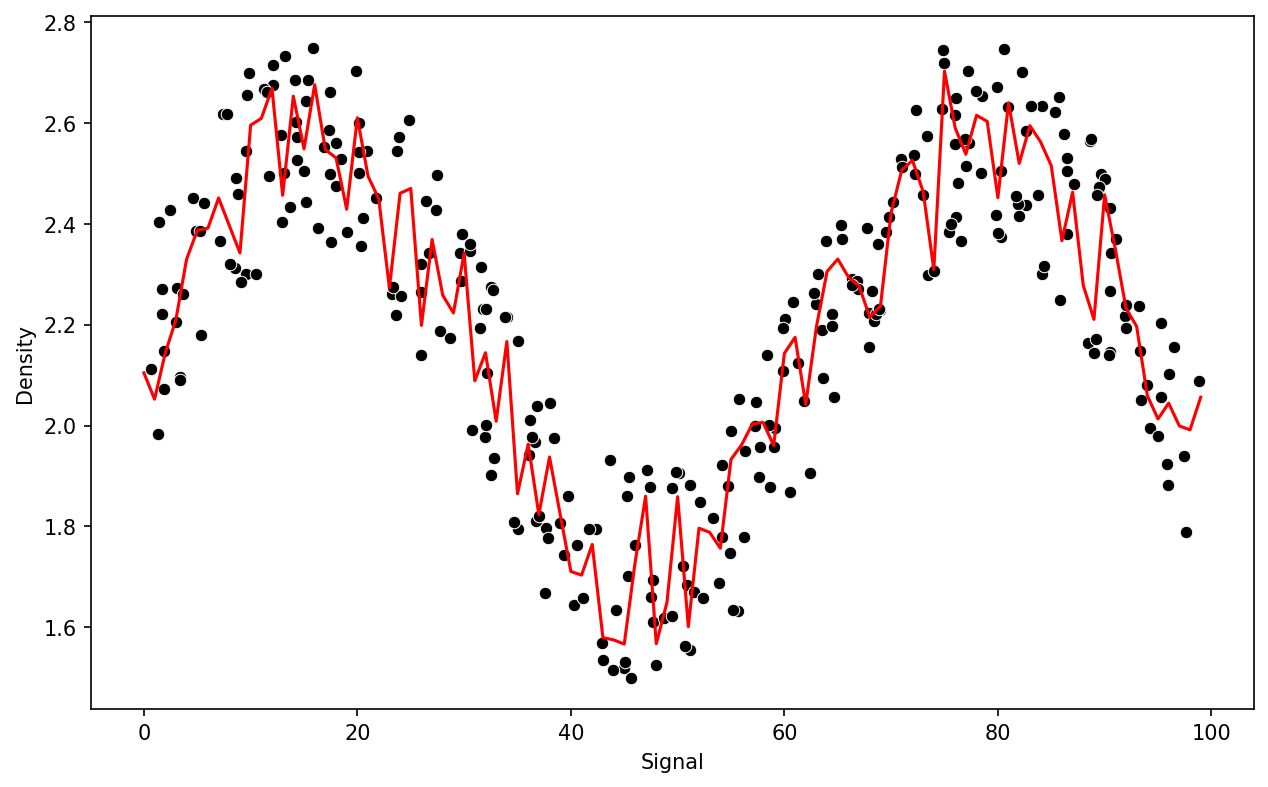

In [120]:
trees = [10,50,100]

for n in trees:    
    model = RandomForestRegressor(n_estimators=n)
    run_model(model,X_train,y_train,X_test,y_test)

## Gradient Boosting

We will cover this in more detail in next section.

In [122]:
from sklearn.ensemble import GradientBoostingRegressor

In [292]:
# help(GradientBoostingRegressor)

RMSE : 0.13294148649584667


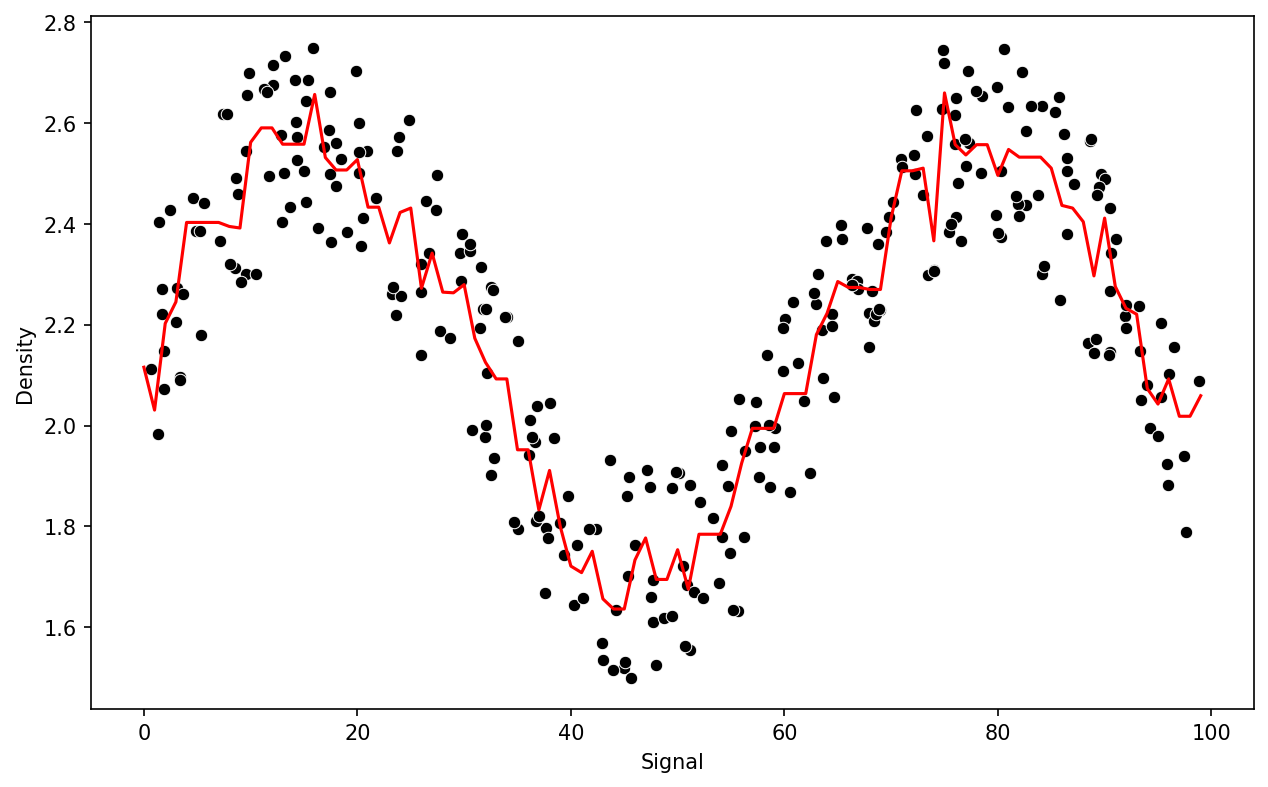

In [126]:
model = GradientBoostingRegressor()
run_model(model,X_train,y_train,X_test,y_test)

## Adaboost

In [128]:
from sklearn.ensemble import AdaBoostRegressor

RMSE : 0.13294148649584667


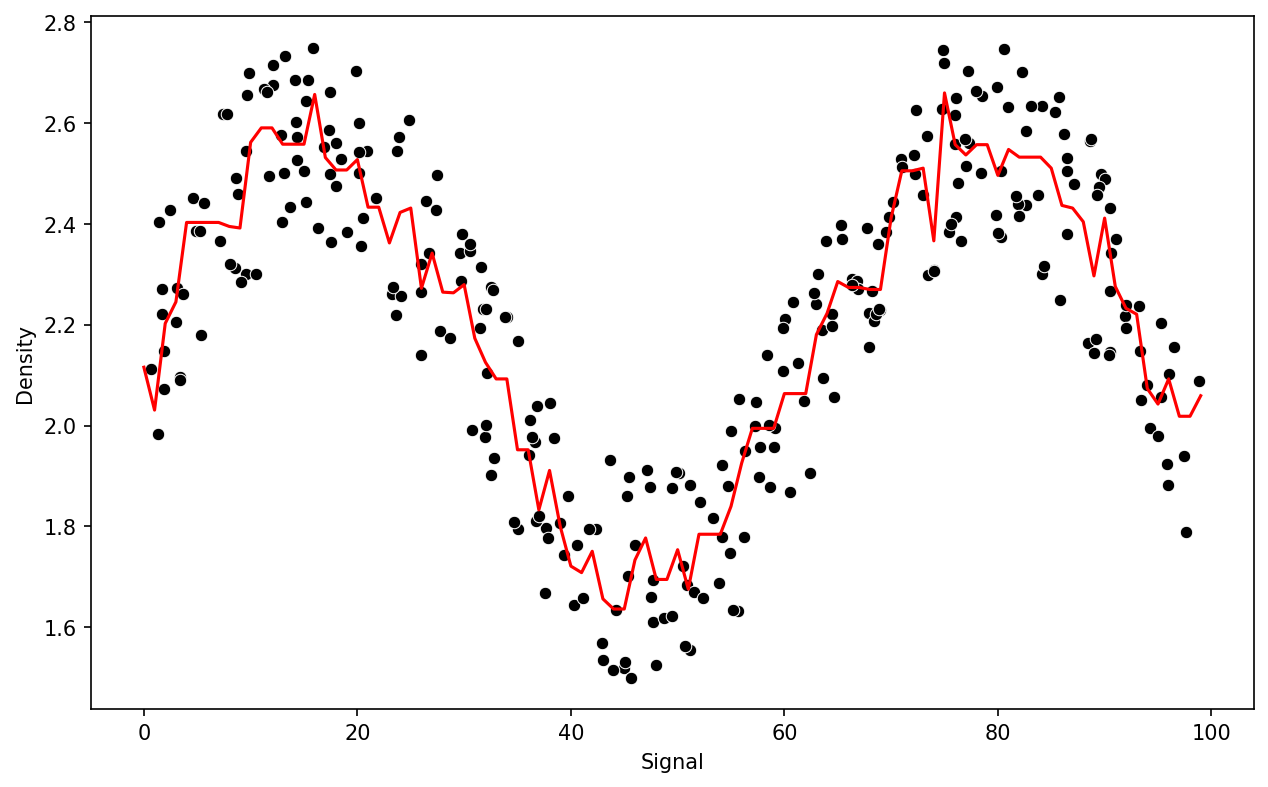

In [130]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)